# Wedneseday 21st November 2020 Amari 15 





---

# Import modules

# Logistic Regression with age and Trestbps

*Use Kaggle to understand the columns.


*  Trestbps = presting blood pressure (in mm Hg on admission to the hospital)
*  cp = chest pain type
*   chol = serum cholestoral in mg/dl
*  








Heart Conditions Project

Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn			
import sklearn.datasets	
import sklearn.linear_model		 
import sklearn.metrics
import random
import tensorflow as tf
from sklearn import tree
import random
import seaborn as sns

In [ ]:
#https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
# Load data 
DATA_URL = "/content/heart.csv"

df = pd.read_csv(DATA_URL,one_hot=True)
display(df)
df_n = df.to_numpy()
display(df)

NameError: ignored

(303, 14)


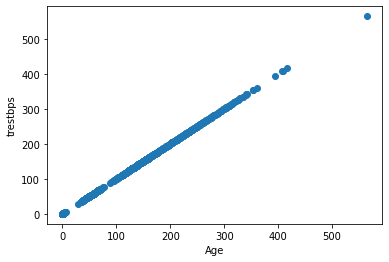

In [ ]:
# This is was in my early time of machine learning
X, y = df_n[:,:], df_n[:,:] # Not really effective in any way
print(df_n.shape)
plt.scatter(X,y)
plt.xlabel("Age")
plt.ylabel("trestbps")
plt.show()


In [ ]:
#x = df.loc[:,"age"]
#y = df.loc[:,"chol"]
#plt.scatter(x,y)
#plt.xlabel("Age")
#plt.ylabel("serum cholestoral in mg/dl")
#plt.show()

In [ ]:
def train_val_test_split(dataset):
  return np.split(dataset, [int(dataset.shape[0] * 0.8), int(dataset.shape[0] * 0.9)]) # Splits data

X_train,X_val,X_test = train_val_test_split(X)
y_train,y_val,y_test = train_val_test_split(y)


In [ ]:
X_train = X_train.reshape(242,1)
y_train = y_train.reshape(242,1)

In [ ]:
model = sklearn.linear_model.LinearRegression() # Creates model doesn't really tell us anything seeing theres no labels in a Supervised learning method
model.fit(X_train,y_train)
w = model.coef_
b = model.intercept_
print(w)

ValueError: ignored

In [ ]:
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)
print(sklearn.metrics.mean_squared_error(yhat_train,y_train))
print(sklearn.metrics.mean_squared_error(yhat_val,y_val)) # evaluate


9.386330070206511e-29
1.5213346554513478e-28


# **Attempt 2**

In [ ]:
df = pd.DataFrame(df)
display(df)

NameError: ignored

In [ ]:
df_age = df.iloc[:,0]
df_trestbps = df.iloc[:,3] # I realise labels are required
X, y = df_age,df_trestbps
X = X.to_numpy()
y = y.to_numpy()
X.reshape(303,1)
y.reshape(303,1)

X2 = np.log(df_age)
y2 = np.log(df_trestbps)
X2 = X2.to_numpy()
y2 = y2.to_numpy()

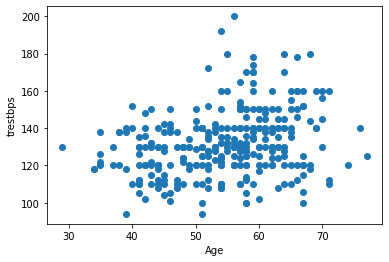

In [ ]:
plt.scatter(X,y)
plt.xlabel("Age")
plt.ylabel("trestbps")
plt.show()


In [ ]:
def train_val_test_split(dataset):
  return np.split(dataset, [int(dataset.shape[0] * 0.8), int(dataset.shape[0] * 0.9)])

X_train,X_val,X_test = train_val_test_split(X2)
y_train,y_val,y_test = train_val_test_split(y2)

In [ ]:
X_train = X_train.reshape(121,2)
y_train = y_train.reshape(121,2)
X_val = X_val.reshape(15,2)
y_val = y_val.reshape(15,2)

In [ ]:
model_2 = sklearn.linear_model.LinearRegression()
model_2.fit(X_train,y_train)
w = model_2.coef_
b = model_2.intercept_
print(w)

[[0.20801088 0.07184379]
 [0.02299261 0.20692625]]


In [ ]:
# Lookin for linear relationship
yhat_train = model_2.predict(X_train)
yhat_val = model_2.predict(X_val)
print(sklearn.metrics.mean_squared_error(yhat_train,y_train))
print(sklearn.metrics.mean_squared_error(yhat_val,y_val))
#Closer to zero is a good MSE


0.014683775043365377
0.024512100100689046


[[ 0.06976777  0.13624034]
 [ 0.0159583  -0.02872805]
 [ 0.00811726  0.16026776]
 [ 0.37214411  0.01837432]
 [ 0.10215612  0.05870479]
 [ 0.01527886 -0.31518785]
 [ 0.20211168  0.11897227]
 [-0.02504554  0.1115497 ]
 [ 0.13940354 -0.01551708]
 [ 0.27501254 -0.15085144]
 [-0.06274298 -0.22188265]
 [-0.18167731 -0.19557099]
 [ 0.32837991 -0.08217737]
 [-0.06633248 -0.0125368 ]
 [-0.055653    0.00375846]]


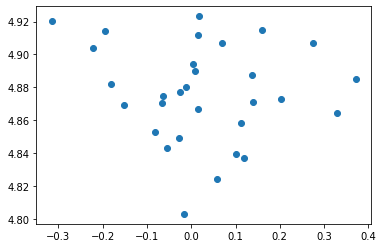

In [ ]:
r = y_val - yhat_val 
print(r) # Found residual which was good with a random distribution of data
plt.scatter(r,yhat_val)

# Titanic Machine Learning

👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the "Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!



The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Recommended Tutorial
We highly recommend Alexis Cook’s Titanic Tutorial that walks you through making your very first submission step by step.
Overview of How Kaggle’s Competitions Work
1. Join the Competition

Read about the challenge description, accept the Competition Rules and gain access to the competition dataset.

2. Get to Work

Download the data, build models on it locally or on Kaggle Kernels (our no-setup, customizable Jupyter Notebooks environment with free GPUs) and generate a prediction file.

3. Make a Submission

Upload your prediction as a submission on Kaggle and receive an accuracy score.

4. Check the Leaderboard

See how your model ranks against other Kagglers on our leaderboard.

5. Improve Your Score

Check out the discussion forum to find lots of tutorials and insights from other competitors.

Kaggle Lingo Video
You may run into unfamiliar lingo as you dig into the Kaggle discussion forums and public notebooks. Check out Dr. Rachael Tatman’s video on Kaggle Lingo to get up to speed!
What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

How to Submit your Prediction to Kaggle
Once you’re ready to make a submission and get on the leaderboard:

1. Click on the “Submit Predictions” button



2. Upload a CSV file in the submission file format. You’re able to submit 10 submissions a day.



Submission File Format:

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
Got it! I’m ready to get started. Where do I get help if I need it?
For Competition Help: Titanic Discussion Forum
Technical Help: Kaggle Contact Us Page

Kaggle doesn’t have a dedicated support team so you’ll typically find that you receive a response more quickly by asking your question in the appropriate forum. The forums are full of useful information on the data, metric, and different approaches. We encourage you to use the forums often. If you share your knowledge, you'll find that others will share a lot in turn!

A Last Word on Kaggle Notebooks
As we mentioned before, Kaggle Notebooks is our no-setup, customizable, Jupyter Notebooks environment with free GPUs and a huge repository of community published data & code.

In every competition, you’ll find many Kernels publically shared with incredible insights. It’s an invaluable resource worth becoming familiar with. Check out this competition’s Kernel’s here.

In [ ]:
#https://www.kaggle.com/c/titanic

In [ ]:
DATA_URL_TR = "/content/train.csv"

df_tr = pd.read_csv(DATA_URL_TR)
display(df_tr)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
DATA_URL_GS = "/content/gender_submission.csv"

df_gs = pd.read_csv(DATA_URL_GS)
display(df_gs)
print(pd.unique(df_gs.iloc[:,0]))

In [ ]:
DATA_URL_TE = "/content/test.csv"

df_te = pd.read_csv(DATA_URL_TE)
display(df_te)
X_test = df_te.loc[:,"Pclass"]
X_test = X_test.to_numpy()
X_test = X_test.reshape(418,1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
def column_bool_series(dataframe,column,bool_value): # Create function for finding basic boolean series to determine who died or lived
   overall_1st = dataframe.loc[:,column] == bool_value 
   overall_1st = overall_1st.sum()
   return overall_1st

column_bool_series(df_tr,"Survived",1)

342

In [ ]:
# Check how many people died
#Check who died from id and survived

died_sum  = column_bool_series(df_tr,"Survived",0)
live_sum =  column_bool_series(df_tr,"Survived",1)
print("Died",died_sum)
print("Lived",live_sum)
perc_died = (died_sum / (live_sum+died_sum))* 100
perc_lived =  (live_sum/(live_sum+died_sum)* 100)
print("Percentage of who died",perc_died)
print("Percentage of who lived",perc_lived)


Died 549
Lived 342
Percentage of who died 61.61616161616161
Percentage of who lived 38.38383838383838


[3 1 2]


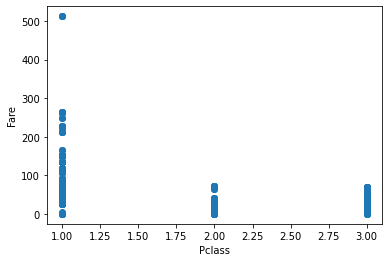

In [ ]:
# Compare those who died to a threshold of how much the fair is.
# Compare the cheapest with those who died
# $ Compare Pclass with fair
#/ Heatmap x = passengerId, y = Pclass, z = Fare
print(pd.unique(df_tr["Pclass"]))
x = df_tr.loc[:,"Pclass"]
y = df_tr.loc[:,"Fare"]
z = df_tr.loc[:,"PassengerId"]
plt.scatter(x,y)
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()


In [ ]:
# $ Person who bought the fare for 500 hundred did he live
# $ Find threshold of those who paid 200 or more and see if they lived, if so why?
fare_live_500 = df_tr.loc[:,"Fare"] > 500 
mask = fare_live_500
cols = ["Name","PassengerId","Fare","Pclass","Survived","SibSp"]
filt_df = df_tr.loc[mask,cols]
display(filt_df)
print("The Three richest people who bought the highest fair all survived")

,Name,PassengerId,Fare,Pclass,Survived,SibSp
258,"Ward, Miss. Anna",259,512.3292,1,1,0
679,"Cardeza, Mr. Thomas Drake Martinez",680,512.3292,1,1,0
737,"Lesurer, Mr. Gustave J",738,512.3292,1,1,0


The Three richest people who bought the highest fair all survived


In [ ]:
df_unk = filt_df.iloc[:,]

In [ ]:
# The Sum of People who paid a fare of 200 or more and who died
fare_over_200 = df_tr.loc[:,"Fare"] > 500
mask_over_200 = fare_over_200
cols = ["Name","PassengerId","Fare","Pclass","Survived","Age"]
filt_over_200_df = df_tr.loc[mask_over_200,cols]
display(filt_over_200_df.sort_values("Survived",ascending=True))
filt_200_surv = column_bool_series(filt_over_200_df,"Survived",1)
filt_200_dead = column_bool_series(filt_over_200_df,"Survived",0)
print("People who survived:",filt_200_surv.sum())
print("People who Died:",filt_200_dead.sum())
print("Percentage of people dead:",(filt_200_dead.sum()/filt_200_surv.sum()*100))
print("Percentage of who lived:", 100 - (filt_200_dead.sum()/filt_200_surv.sum()*100))

,Name,PassengerId,Fare,Pclass,Survived,Age
258,"Ward, Miss. Anna",259,512.3292,1,1,35.0
679,"Cardeza, Mr. Thomas Drake Martinez",680,512.3292,1,1,36.0
737,"Lesurer, Mr. Gustave J",738,512.3292,1,1,35.0


People who survived: 3
People who Died: 0
Percentage of people dead: 0.0
Percentage of who lived: 100.0


In [ ]:
# Of those who died make a data frame of the potential variables
died = df_tr.loc[:,"Survived"] == 0
und_100 = df_tr.loc[:,"Fare"] < 500
mask_died_und = died & und_100
cols = ["PassengerId","Pclass","Survived","Fare"]

f_df = df_tr.loc[mask_died_und,cols]
f_df = f_df.rename(columns={"Survived":"Died"})
display(f_df)


,PassengerId,Pclass,Died,Fare
0,1,3,0,7.2500
4,5,3,0,8.0500
5,6,3,0,8.4583
6,7,1,0,51.8625
7,8,3,0,21.0750
...,...,...,...,...
884,885,3,0,7.0500
885,886,3,0,29.1250
886,887,2,0,13.0000
888,889,3,0,23.4500


In [ ]:
# Trying to find how many people of one class died
print("Overall people on board:")

overall_1st = df_tr.loc[:,"Pclass"] == 1
overall_2nd = df_tr.loc[:,"Pclass"] == 2
overall_3rd = df_tr.loc[:,"Pclass"] == 3

print("1st class total on board:",overall_1st.sum())
print("2nd class total on board:",overall_2nd.sum())
print("3rd class total on board:",overall_3rd.sum())
print("Overall on board",216+184+491)

died_1st = f_df.loc[:,"Pclass"] == 1
died_2nd = f_df.loc[:,"Pclass"] == 2
died_3rd = f_df.loc[:,"Pclass"] == 3
print("People who died:")
print("1st class who died:",died_1st.sum())
print("2nd class who died:",died_2nd.sum())
print("3rd class who died:",died_3rd.sum())
print("Overall Dead",66+97+372)

print("Percentage of who died in each class:")
print("Percentage of 1st class who died",(died_1st.sum()/overall_1st.sum())*100)
print("Percentage of 2nd class who died",(died_2nd.sum()/overall_2nd.sum())*100)
print("Percentage of 3rd class who died",(died_3rd.sum()/overall_3rd.sum())*100)

Overall people on board:
1st class total on board: 216
2nd class total on board: 184
3rd class total on board: 491
Overall on board 891
People who died:
1st class who died: 80
2nd class who died: 97
3rd class who died: 372
Overall Dead 535
Percentage of who died in each class:
Percentage of 1st class who died 37.03703703703704
Percentage of 2nd class who died 52.71739130434783
Percentage of 3rd class who died 75.76374745417516


In [ ]:
display(df_tr)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Trying to see if the amount of siblings someone has effects mortality rate.
print(pd.unique(df_tr.loc[:,"SibSp"]))
print((df_tr.loc[:,"SibSp"] == 1).sum())
mask_3 = df_tr.loc[:,"SibSp"] == 1 
cols_2 = ["PassengerId","Survived","Pclass","Name","Age","Sex","Embarked","SibSp"]
filt = df_tr.loc[mask_3,cols_2]
display(filt)

filt_died = column_bool_series(filt,"Survived",0)
filt_lived = column_bool_series(filt,"Survived",1)
total = filt_died + filt_lived
print("Percentage of who died",(filt_died/total) * 100)
print("Percentage of who lived",(100-(filt_died/total) * 100))


[1 0 3 4 2 5 8]
209


,PassengerId,Survived,Pclass,Name,Age,Sex,Embarked,SibSp
0,1,0,3,"Braund, Mr. Owen Harris",22.0,male,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,female,S,1
...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",27.0,female,C,1
869,870,1,3,"Johnson, Master. Harold Theodor",4.0,male,S,1
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,female,S,1
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,female,C,1


Percentage of who died 46.411483253588514
Percentage of who lived 53.588516746411486


In [ ]:
# Tring to find common relatives
df_tr_s = pd.Series(df_tr.loc[:,"Name"])
cols = ["Name","Age","SibSp","Pclass"]
mask = df_tr_s.str.contains(pat='Harris') 
print("Names with Harris in them:",mask.sum())

filt = df_tr.loc[mask,cols]

display(filt)




"""
mask = df_tr.loc[:,"Name"] == 
cols = ["Name","Age","SibSp"]
filt_ddf = df_tr.loc[mask,cols]
display(filt_ddf)
"""

Names with Harris in them: 6


,Name,Age,SibSp,Pclass
0,"Braund, Mr. Owen Harris",22.0,1,3
62,"Harris, Mr. Henry Birkhardt",45.0,1,1
219,"Harris, Mr. Walter",30.0,0,2
230,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,1
263,"Harrison, Mr. William",40.0,0,1
570,"Harris, Mr. George",62.0,0,2


'\nmask = df_tr.loc[:,"Name"] == \ncols = ["Name","Age","SibSp"]\nfilt_ddf = df_tr.loc[mask,cols]\ndisplay(filt_ddf)\n'

In [ ]:
#fare_bel_500 = df_tr.loc[:,"Fare"] < 500
fare_bel_500 = df_tr.loc[:,"Pclass"]
cols = ["Pclass"]
filt_bel_500 = df_tr.loc[fare_bel_500,cols]
filt_bel_500 = filt_bel_500.to_numpy()

#cols_500 = ["PassengerId","Fare","Pclass","Survived"]
#filt_over_500_df = df_tr.loc[fare_bel_500,cols_500]
#display(filt_over_500_df)
#print(filt_over_500_df.isnull().sum())


In [ ]:
#Create dataset to feed into model with x = Pclass and y = Survived
for rand in range(0,3):
  randnum = random.randint(0,892)
#  print(randnum)
X_train = filt_bel_500
y_train = df_tr.loc[:,"Survived"]
y_train = pd.DataFrame(y_train)

#y_train = y_train.drop(randnum,axis=0)
#y_train = y_train.drop(208,axis=0)
#y_train = y_train.drop(258,axis=0)
print(y_train.shape)
X_train.shape


(891, 1)


(891, 1)

In [ ]:
display(pd.DataFrame(X_train))
display(pd.DataFrame(y_train))

In [ ]:
from sklearn import cluster
from sklearn import ensemble

In [ ]:
#Get rid of outliers of the super rich people we identified before. 
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [ ]:
print(sklearn.metrics.accuracy_score(y_train,yhat_train))
print(sklearn.metrics.accuracy_score(X_test,yhat_test))


0.6161616161616161
0.0


In [ ]:
#Gender Submission
DATA_URL_GS = "/content/gender_submission.csv"

df_gs = pd.read_csv(DATA_URL_GS)
display(df_gs)

# Tensor Flow Practice

I'm tring to convert the Mandarin characters into unicode to format it properly and refrmat it into a numpy array to be fed into the linear model. May use Logistic regression or **Decision Tree Classifier**

In [ ]:
DATA_T_URL_DL = "/content/chinese_mnist.csv"
#DATA_T_URL = "https://raw.githubusercontent.com/Amari-Lawal/Data-Science-Practice/main/chinese_mnist.csv?token=AOQAAOESEC26FKK5RJEJYDS7SBDH2"
df = pd.read_csv(DATA_T_URL_DL) # Loads in dataset

display(df)

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九
...,...,...,...,...,...
14995,99,5,9,8,八
14996,99,6,9,8,八
14997,99,7,9,8,八
14998,99,8,9,8,八


In [ ]:
df_character = df.loc[:,"character"]
df_values = df.loc[:,"value"]
print(pd.unique(df_character).sum())
#print(df_values["九"].sum())
print(pd.unique(df_values).sum())

#print((df_values == 1).sum())

九十百千万亿零一二三四五六七八
100011155


In [ ]:
#Not main trying to look at all unique values with the corresponding value
df_character = df.iloc[:,-1]
df_values = df.iloc[:,-2]

df_val_char = np.vstack((df_values,df_character))
#display(pd.DataFrame(pd.unique(df_val_char)))
df_val_char = pd.DataFrame(df_val_char)
print(pd.unique(df_val_char))

ValueError: ignored

In [ ]:
df_lables = df.iloc[:,3] # The number that is equivalent to the Mandarin character
df_train = df.iloc[:,-1] # indexes the labeles I can use to classify Mandarin characters 
df_train.shape # shows the shape of the Mandarin column 
df_lables_2 = df_lables.to_numpy()

print(df_lables_2)



[9 9 9 ... 8 8 8]


In [ ]:
uni_train = [] # creates a list to add the unicode of the character into 
uni_empty = np.zeros(15000) #Creates an "empty" numpy array full of zeros
uni_empty = uni_empty.reshape(15000,1) #Reshapes it to have a correct shape 

for chin_char in df_train: # Runs through each the Mandarin character
  char = ord(chin_char) # changes it into unicode
  uni_train.append(char) # Adds all the once Mandarin characters, now unicode ints into list
         # I'm tring to Add all the unicode characters in uni_trainn into a numpy array and reshape it to use in the model.
for i in range(len(uni_train)):
  uni_empty[i] = uni_train[i]
df_labels_2 = df_lables_2.reshape(15000,1)
uni_empty.reshape(15000,1)
print(uni_empty)
print(df_lables_2)
print(df_lables_2.shape)
print(uni_empty.shape)
#np.append(uni_empty,uni_train)

  



[[20061.]
 [20061.]
 [20061.]
 ...
 [20843.]
 [20843.]
 [20843.]]
[9 9 9 ... 8 8 8]
(15000,)
(15000, 1)


In [ ]:
display(df_labels_2)
display(uni_empty)

array([[9],
       [9],
       [9],
       ...,
       [8],
       [8],
       [8]])

array([[20061.],
       [20061.],
       [20061.],
       ...,
       [20843.],
       [20843.],
       [20843.]])

In [ ]:
def train_test_image(dataset):
  return np.split(dataset, [int(dataset.shape[0] * 0.8)]) # Fundtion to split the dataset into training set and test set

In [ ]:
#Main
X_train_images, X_test_labels = train_test_image(uni_empty) # Uses function to split them and store them as variables.
y_train_images, y_test_labels = train_test_image(df_lables_2)

In [ ]:
# Main Attempt 2 Using
X_train_images, X_test_images = train_test_image(uni_empty) 
y_train_labels, y_test_labels = train_test_image(df_lables_2)

In [ ]:
print("X_train_images =", X_train_images.shape)
print("y_train_labels =",y_train_labels.shape)
print("X_test_images =",X_test_images.shape)
print("y_test_label =",y_test_labels.shape)

X_train_images = (12000, 1)
y_train_labels = (12000,)
X_test_images = (3000, 1)
y_test_label = (3000,)


In [ ]:
model = sklearn.tree.DecisionTreeClassifier(min_samples_leaf=2)
model.fit(X_train_images,y_train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_knn = sklearn.linear_model.LogisticRegression(fit_intercept=True)
model_knn.fit(X_train_images,y_train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

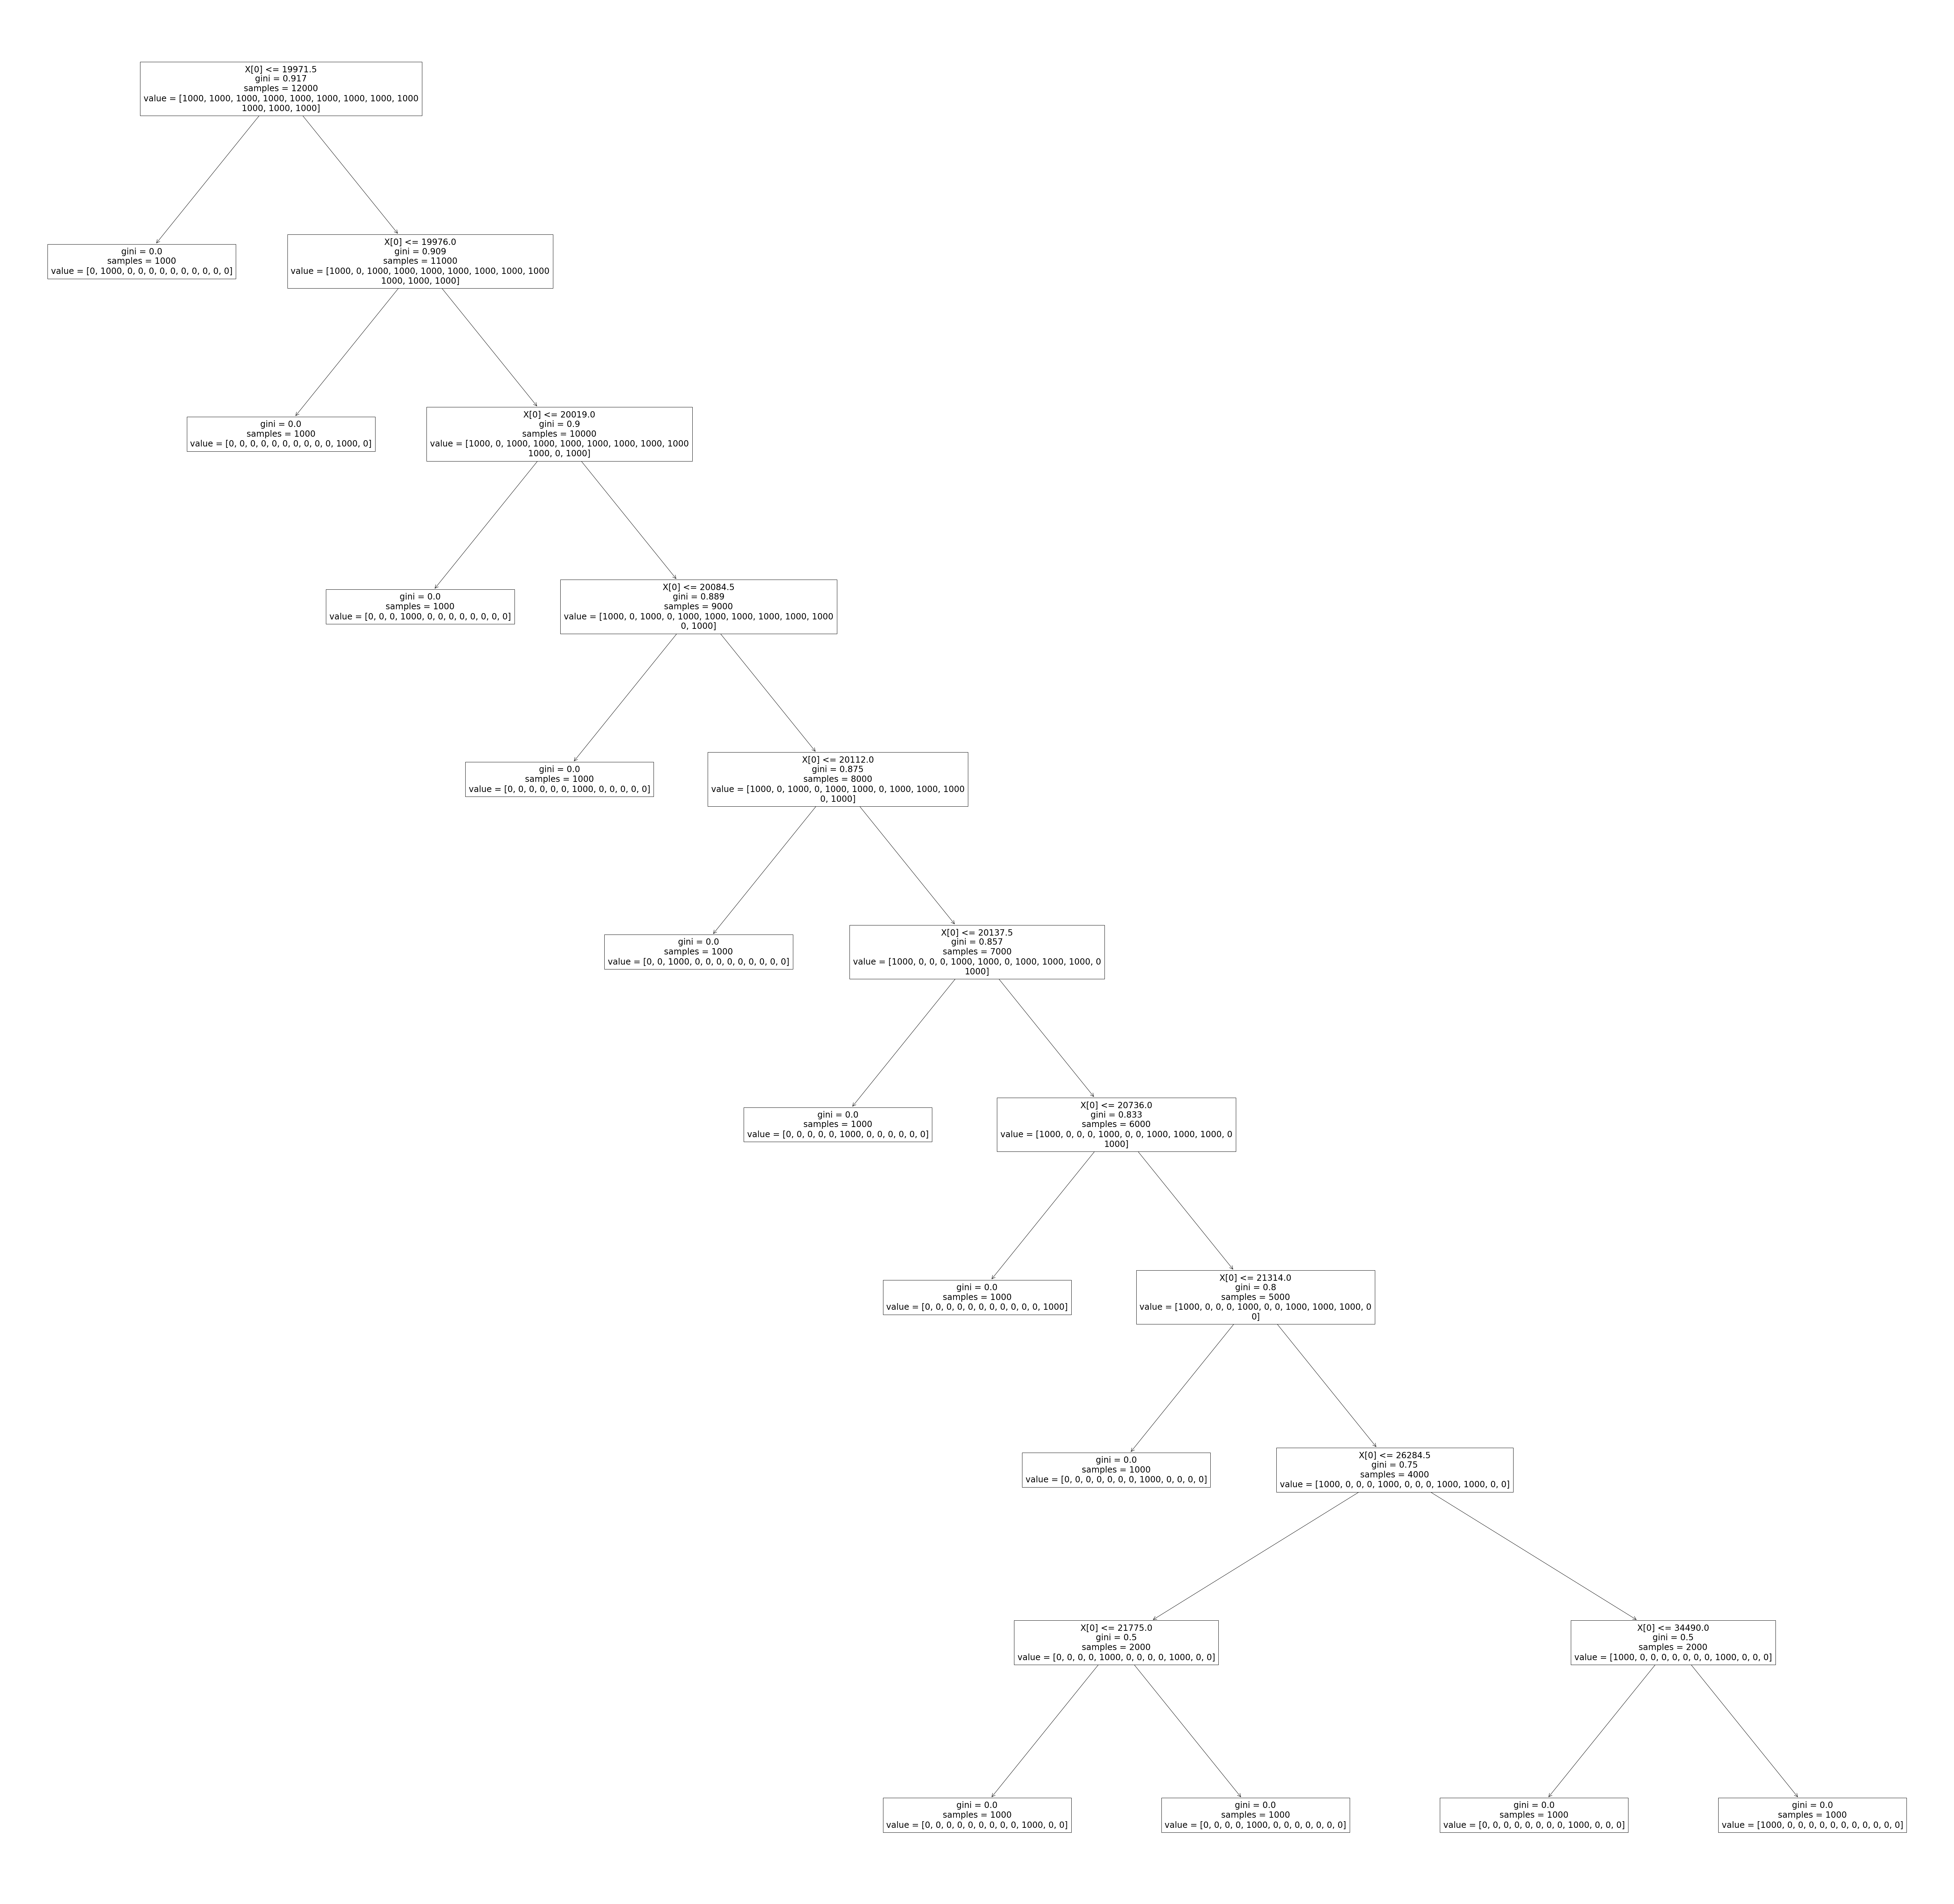

In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(model)

In [ ]:
yhat_train = model.predict(X_train_images)
yhat_test = model.predict(X_test_images)


In [ ]:
yhat_train_knn = model_knn.predict(X_train_images)
yhat_test_knn = model_knn.predict(X_test_images)

In [ ]:
random_num = random.randint(0,1501)
letter_char = chr(X_test_labels[random_num])

print("Chinese value = ",letter_char)
print("Corresponding Denary value = ",yhat_test[random_num])

Chinese value =  八
Corresponding Denary value =  6


In [ ]:
print(ord("a"))
print(chr(97))

97
a


In [ ]:
print("Decision Tree Claasifier:")
print("Train set =",sklearn.metrics.f1_score(y_train_labels,yhat_train,average="macro"))
print("Test set = ",sklearn.metrics.f1_score(y_test_labels,yhat_test,average="macro"))


Train set = 1.0
Test set =  0.0


In [ ]:
print("Logistic R:")
print("Train set =",sklearn.metrics.f1_score(y_train_labels,yhat_train_knn,average="macro")) # Didn't fully work
print("Test set = ",sklearn.metrics.f1_score(y_test_labels,yhat_test_knn,average="macro"))

Logistic R:
Train set = 1.0
Test set =  0.0
